<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Logistic Regression


---


## Learning Objectives

### Core
- Understand how logistic regression is similar to and different from regression
- Fit logistic regression with sklearn on a dataset
- Understand how to interpret the coefficients of logistic regression as enhancing/diminishing the probability of belonging to a given class
- Know the benefits of logistic regression as a parametric classification model with interpretable coefficients

### Target
- Code the calculation of the odds and log-odds

### Stretch
- Understand the math behind the logit link function (and logistic function)

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li></ul></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span><ul class="toc-item"><li><span><a href="#Some-examples-of-when-logistic-regression-could-be-used:" data-toc-modified-id="Some-examples-of-when-logistic-regression-could-be-used:-2.1">Some examples of when logistic regression could be used:</a></span></li></ul></li><li><span><a href="#Fitting-logistic-regression-with-scikit-learn" data-toc-modified-id="Fitting-logistic-regression-with-scikit-learn-3">Fitting logistic regression with scikit-learn</a></span></li><li><span><a href="#From-sigmoid-to-logistic-function" data-toc-modified-id="From-sigmoid-to-logistic-function-4">From sigmoid to logistic function</a></span></li><li><span><a href="#Using-all-predictors" data-toc-modified-id="Using-all-predictors-5">Using all predictors</a></span></li><li><span><a href="#Standardization" data-toc-modified-id="Standardization-6">Standardization</a></span></li><li><span><a href="#Fit-on-all-predictors" data-toc-modified-id="Fit-on-all-predictors-7">Fit on all predictors</a></span><ul class="toc-item"><li><span><a href="#Tune-for-the-best-regularization-strength-using-LogisticRegressionCV." data-toc-modified-id="Tune-for-the-best-regularization-strength-using-LogisticRegressionCV.-7.1">Tune for the best regularization strength using <code>LogisticRegressionCV</code>.</a></span></li></ul></li><li><span><a href="#Additional-resources" data-toc-modified-id="Additional-resources-8">Additional resources</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Introduction

---

Logistic regression is one of the most frequently used classifiers. It _is_ a regression, but don't let that confuse you: it operates as a classifier. It estimates probabilities of class membership. This is done by predicting the so-called log-odds from a kind of regression model.

In this lesson we will only consider the binary outcome case with two classes, but logistic regression can be generalized to multiple classes.

### Some examples of when logistic regression could be used:


- Predict whether or not a user will purchase a product given their demographic characteristics
- Predict the likelihood of a student being admitted to a college given their scores and the characteristics of the college
- Diagnose a patient with a disease or not, given symptoms
- Predict whether a person will default on a loan and with what likelihood

And many more. 

Let's load the famous Wisconsin breast cancer dataset from scikit-learn as an example.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [6]:
df.shape, y.shape

((569, 30), (569,))

In [7]:
# baseline
y.value_counts(normalize=True)

1    0.627417
0    0.372583
dtype: float64

## Fitting logistic regression with scikit-learn

Syntactically this is going to be very simple. All we need to do is import the model, fit, get the score, predictions and probabilities of belonging to either class.

Specific to logistic regression is that we will get model coefficients and and intercept.

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# start with a single predictor variable

X = df[['mean radius']]

# specify solver (numerical algorithm), otherwise you will see some notification
# increase the default number of iteration steps

model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X, y)
# accuracy score
model.score(X, y)

0.8787346221441125

Our predictions are quite good because the predictor values are distributed in a quite different way for each of the classes.

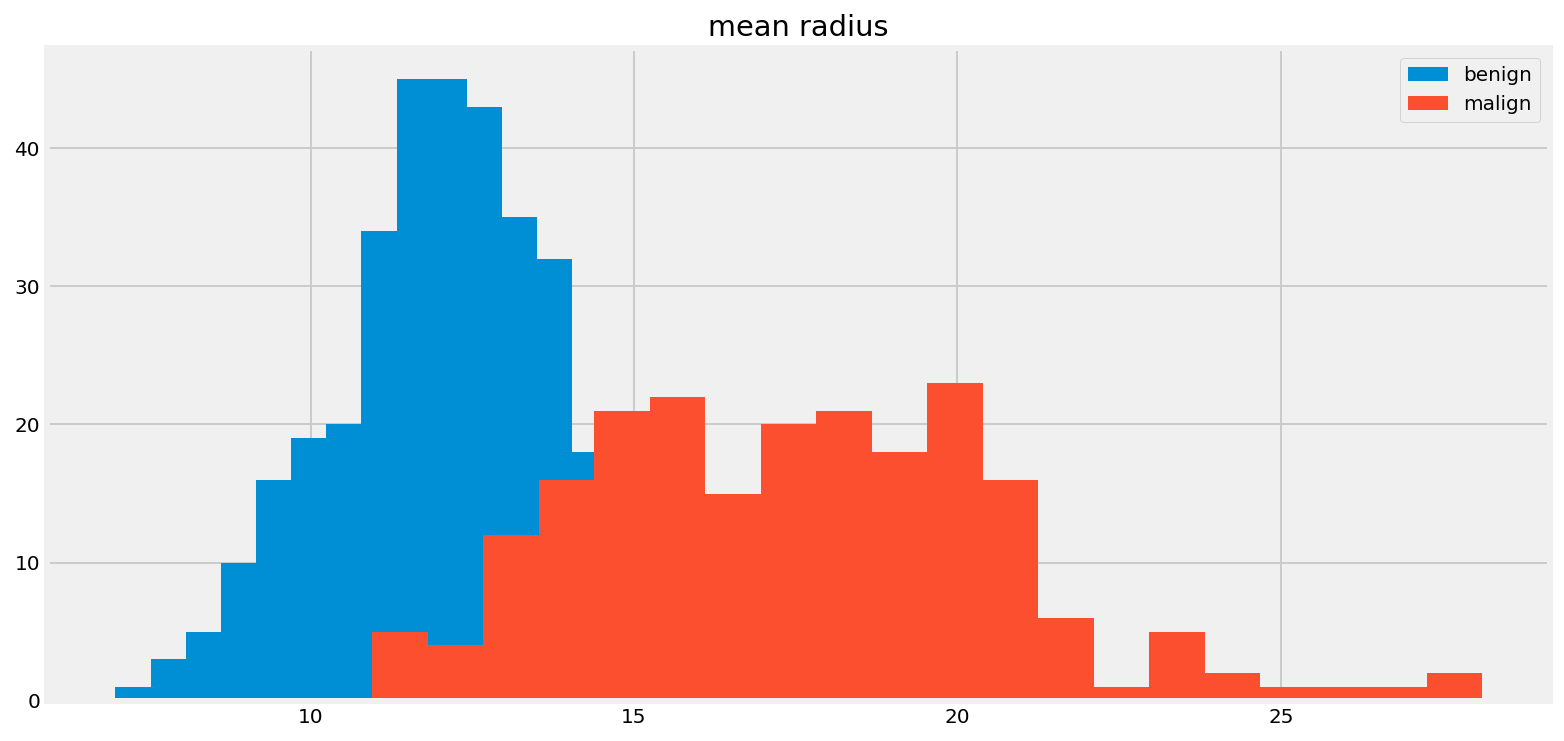

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
X[y==1].hist(bins=20, ax=ax, label='benign')
X[y==0].hist(bins=20, ax=ax, label='malign')
ax.legend()
plt.show()

In [11]:
# predicted probabilities - values in row sum to 1
model.predict_proba(X)[:10]

array([[0.96492156, 0.03507844],
       [0.99742244, 0.00257756],
       [0.99367277, 0.00632723],
       [0.03173187, 0.96826813],
       [0.99656877, 0.00343123],
       [0.08606248, 0.91393752],
       [0.97290393, 0.02709607],
       [0.25511868, 0.74488132],
       [0.14196396, 0.85803604],
       [0.08687193, 0.91312807]])

In [12]:
# which column belongs to which class?
model.classes_

array([0, 1])

In [13]:
# predicted labels - larger of the two probabilities
model.predict(X)[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [14]:
# model coefficients
model.coef_

array([[-1.02475609]])

In [15]:
# model intercept
model.intercept_

array([15.120902])

In logistic regression, we try to determine for each datapoint to which of two classes (say 0 and 1) it is more likely to belong depending on the observed predictor values.

We make predictions for the probability of belonging to one of the classes based on $p$ predictor variables with 

$$
P(y=1|X) = \frac{1}{1+e^{-\left(\beta_0 + \beta_{1}X_1
+ \beta_{2}X_2+\ldots+ \beta_{p}X_p
\right)}}
$$

The function 

$$
f(z) = \frac{1}{1+e^{-z}}
$$

is called the sigmoid.

In [16]:
def sigmoid(X, intercept, coefs):
    predictor_sum = intercept + X.dot(coefs)
    p_1 = 1/(1+np.exp(-predictor_sum))
    return p_1

We can use the sigmoid function to obtain the predicted probabilities and compare against those obtained by scikit-learn. 

In [17]:
np.allclose(model.predict_proba(X)[:, 1], 
            sigmoid(X, model.intercept_, model.coef_).values.ravel())

True

At the point where 

$$\beta_0+\beta_1 X_1=0$$

the predicted probability becomes equal to 0.5. 

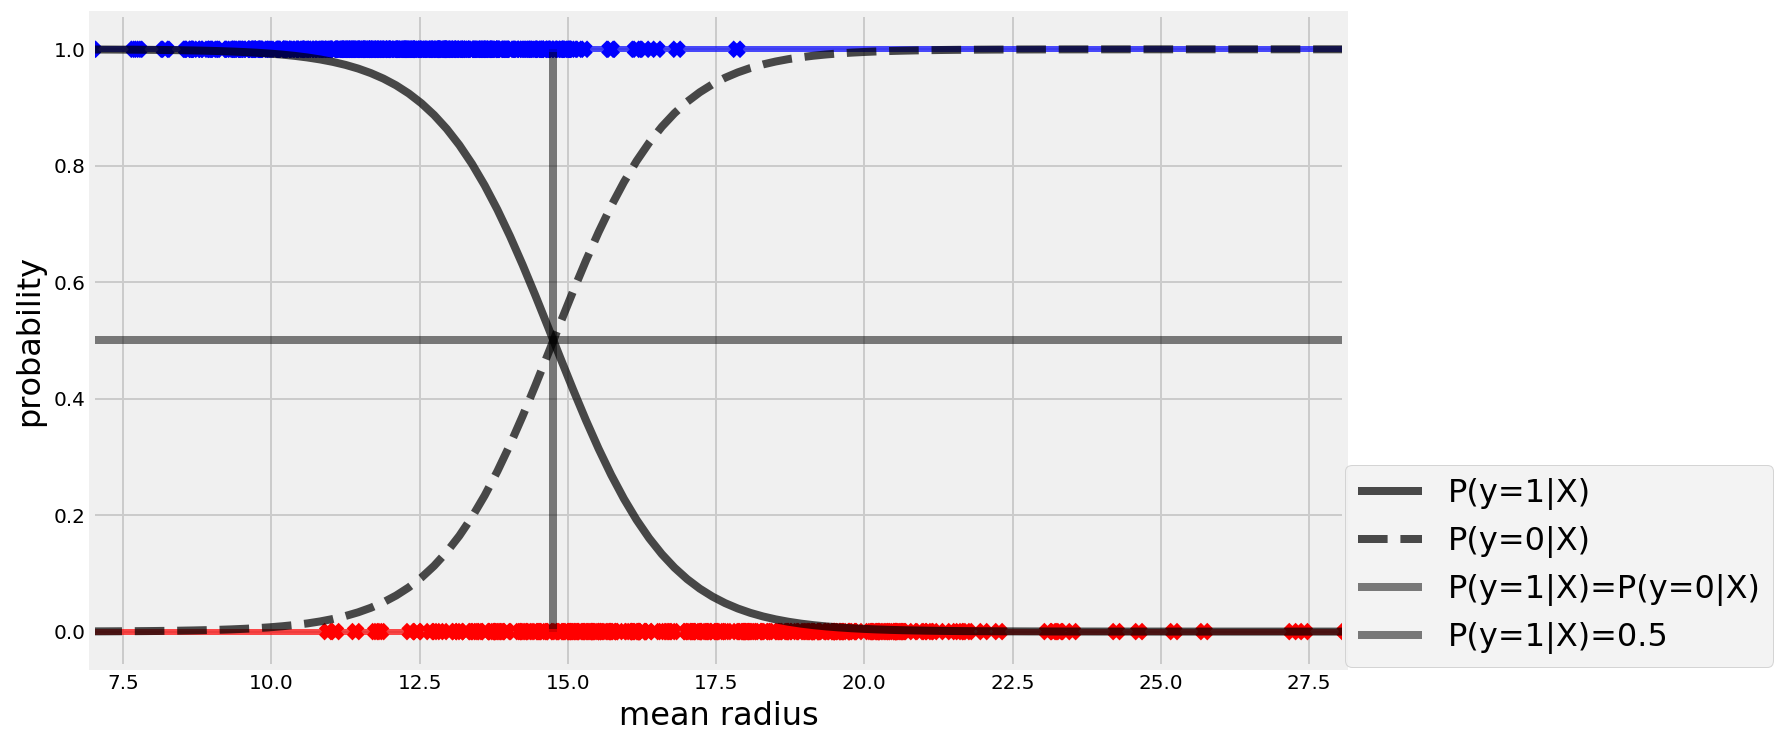

In [18]:
# create some x-values as suitable for a continuous predictor variable
xvals = np.linspace(X.min(), X.max(), 100)
yvals = model.predict_proba(xvals)

plt.figure(figsize=[10, 6])
plt.axhline(y=0, linewidth=3, c='r', alpha=0.7)
plt.axhline(y=1, linewidth=3, c='b', alpha=0.7)
plt.scatter(X.values.ravel(), y, c=y.map(lambda x: 'r' if x==0 else 'b'), marker='x')
plt.plot(xvals.ravel(), yvals[:, 1], lw=4, c='k', alpha=0.7, 
        label='P(y=1|X)')
plt.plot(xvals.ravel(), yvals[:, 0], lw=4, ls='--', c='k', alpha=0.7,
        label='P(y=0|X)')
plt.vlines(-model.intercept_/model.coef_[0], 0, 1, 
           label='P(y=1|X)=P(y=0|X)', alpha=0.5)
plt.hlines(0.5, X.min(), X.max(), label='P(y=1|X)=0.5', alpha=0.5)
plt.xlim([X.min().values, X.max().values])
plt.xlabel(f'{X.columns[0]}', fontsize=16)
plt.ylabel('probability', fontsize=16)
plt.legend(loc=[1, 0], fontsize=16)
plt.show()

In logistic regression we don't have a straight line relationship between predicted probabilities and predictor values. One unit increase in X does not imply one unit increase in probability. 


**Why is that good?**

## From sigmoid to logistic function

We can write our formula in a different way.
Let's abbreviate 

$$
Z = \beta_0+\beta_1 X_1 + \ldots + \beta_p X_p
$$

and $p=P(y=1|X)$.

Then 

$$
\begin{eqnarray*}
p &=& 
\frac{1}{1+e^{-Z}}
\\
p\left(1+e^{-Z}\right) &=& 1\\
p+p e^{-Z} &=& 1\\
pe^{-Z} &=& 1-p\\
e^{-Z} &=& \frac{1-p}{p}\\
e^Z &=& \frac{p}{1-p}\\
Z &=& \log\left(\frac{p}{1-p}\right) 
\end{eqnarray*}
$$

or equivalently

$$
\log\left(\frac{P(y=1|X)}{1-P(y=1|X)}\right)
= \beta_0+\beta_1 X_1 + \ldots + \beta_p X_p
$$

The left-hand side of the equation is often called the log-odds,
and $p/(1-p)$ are called the odds.

Taking the log-odds of $P$ is also expressed as applying the logistic function to $P$. In this way the logistic function relates the probabilities that we would like to predict to the linear combination of beta coefficients and predictors that we know from linear regression. The same could be achieved by other functions than the logistic function. More generically, any function used for this purpose is called a **link function**. 

## Using all predictors

In [19]:
# start with a single predictor variable

X = df.copy()

## Standardization

Standardization will be important since we would like to use some form of regularization.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Fit on all predictors

In [21]:
# specify solver (numerical algorithm), otherwise you will see some notification
# increase the default number of iteration steps
model = LogisticRegression(C=1, penalty='l2', solver='lbfgs', max_iter=10000)
model.fit(X, y)
# accuracy score
model.score(X, y)

0.9876977152899824

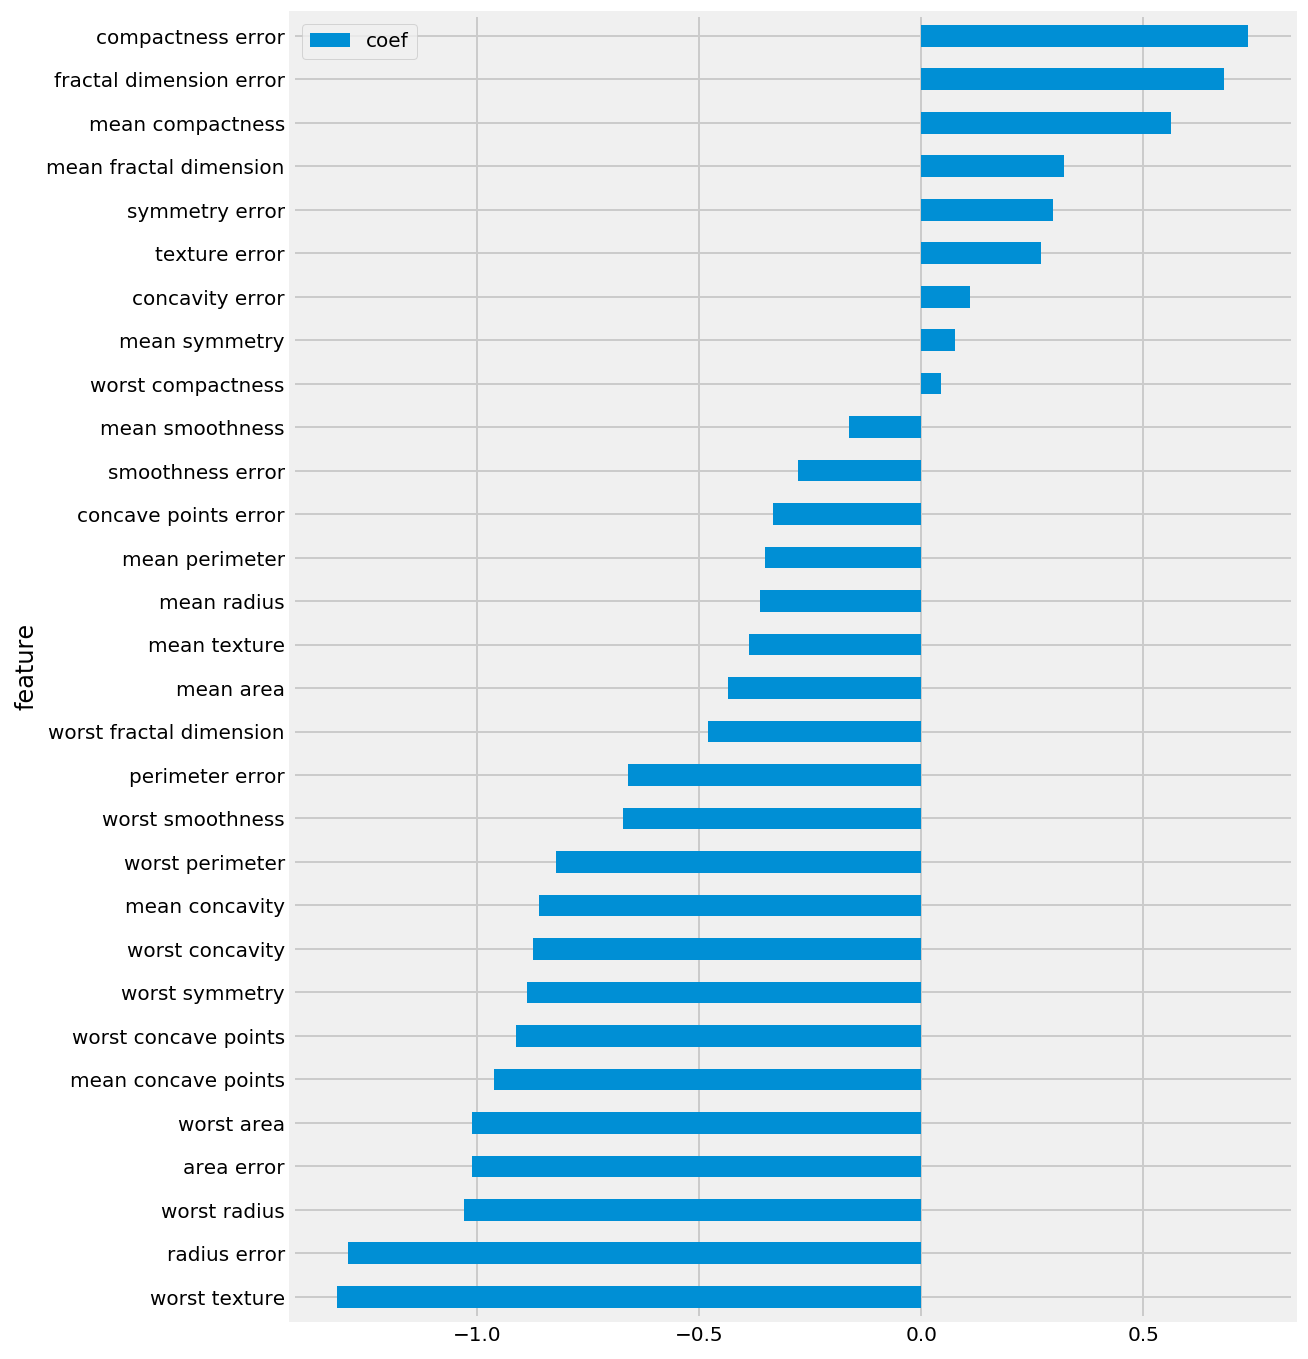

In [22]:
pd.DataFrame(list(zip(X.columns, model.coef_[0])), 
             columns=['feature', 'coef']) \
    .sort_values(by='coef') \
    .plot(kind='barh', x='feature', y='coef', figsize=(8, 12))
plt.show()

> Note that we set explicitly default values related to regularization. Here within the default logistic regression method we have the option to specify which regularization type to use (`l2` penalty for ridge like and `l1` penalty for lasso like) and the parameter `C` sets the regularization strength. Here, large `C` implies weak regularization and small `C` strong regularization! Since regularization is the default setting, you should always standardize your data!

### Tune for the best regularization strength using `LogisticRegressionCV`.

We still need to use cross validation to test our model and to adjust the regularization strength. This can be done with the `LogisticRegressionCV` method. It works like `RidgeCV` etc. in linear regression, but bundles the available penalty types. Note that not all numerical solvers can be used with both penalty types. For `l1` penalty, 
use `LogisticRegressionCV(penalty='l1', solver='liblinear')`.

In [23]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

In [24]:
model_cv = LogisticRegressionCV(Cs=np.logspace(-4, 4, 15), 
                        penalty='l2', max_iter=10000, cv=5)
model_cv.fit(X, y)
model_cv.score(X, y)

0.9859402460456942

In [25]:
model_cv.C_

array([0.26826958])

In [26]:
model = LogisticRegression(C=model_cv.C_[0], penalty='l2', solver='lbfgs')
model.fit(X, y)
cross_val_score(model, X, y, cv=5).mean()

0.9806848787995384

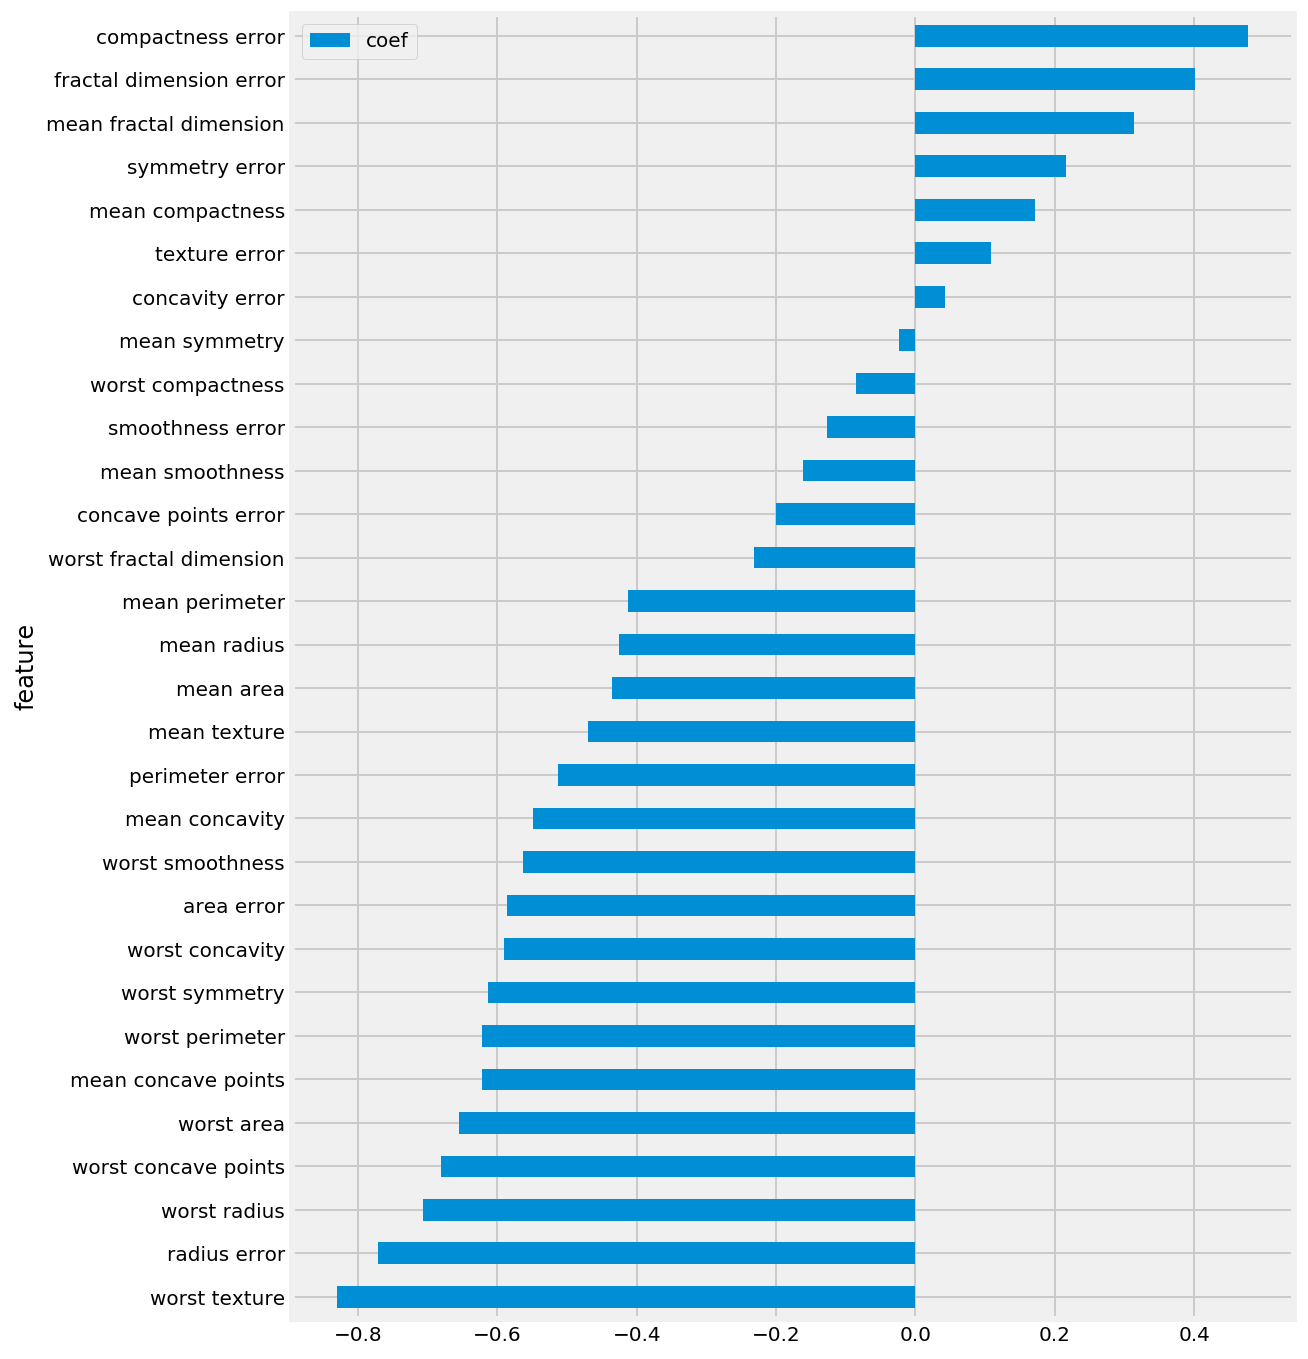

In [27]:
pd.DataFrame(list(zip(X.columns, model.coef_[0])), 
             columns=['feature', 'coef']) \
    .sort_values(by='coef') \
    .plot(kind='barh', x='feature', y='coef', figsize=(8, 12))
plt.show()

In [28]:
model_cv = LogisticRegressionCV(Cs=np.logspace(-4, 4, 15), penalty='l1', solver='liblinear', max_iter=10000, cv=5)
model_cv.fit(X, y)
model_cv.score(X, y)

0.9859402460456942

In [29]:
model = LogisticRegression(C=model_cv.C_[0], penalty='l1', solver='liblinear')
model.fit(X, y)
cross_val_score(model, X, y, cv=5).mean()

0.9754982685648326

In [30]:
model_cv.C_

array([0.26826958])

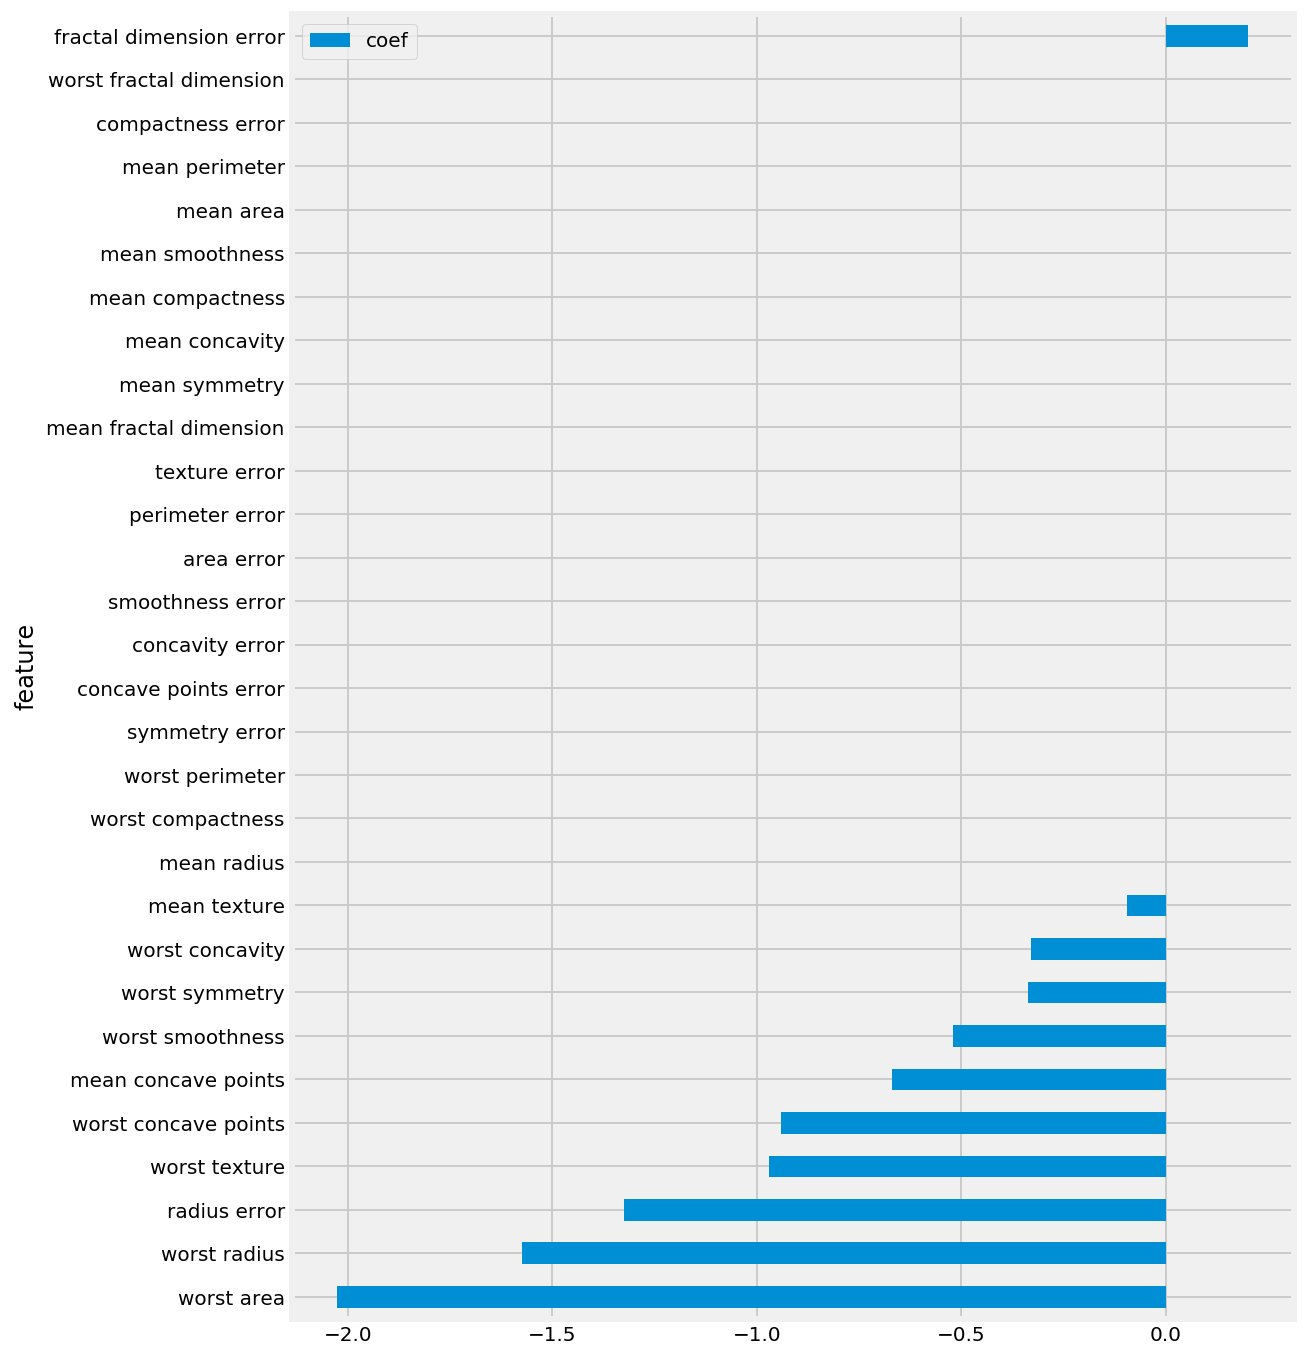

In [31]:
pd.DataFrame(list(zip(X.columns, model.coef_[0])), 
             columns=['feature', 'coef']) \
    .sort_values(by='coef') \
    .plot(kind='barh', x='feature', y='coef', figsize=(8, 12))
plt.show()

## Additional resources

---

- [Scikit-learn logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Logistic Regression Video Walkthrough](https://www.youtube.com/watch?v=zAULhNrnuL4&noredirect=1)
- [Logistic Regression Walkthrough](http://www.mc.vanderbilt.edu/gcrc/workshop_files/2004-11-12.pdf)
- [Logistic Regression with Statsmodels - Well Switching in Bangladesh](http://nbviewer.ipython.org/urls/raw.github.com/carljv/Will_it_Python/master/ARM/ch5/arsenic_wells_switching.ipynb)
- [Odds Ratio Explanation](http://www.wright.edu/~thaddeus.tarpey/ES714glm.pdf)
- [0 and 1 are not probabilities](http://lesswrong.com/lw/mp/0_and_1_are_not_probabilities/)